In [1]:
# Spark
import pyspark

# Visaulization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
from subprocess import check_output
print(check_output(["ls", "/Users/dzzxjl/data/ml-100k/"]).decode("utf8"))

README
allbut.pl
mku.sh
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test



In [4]:
user_data = sc.textFile('/Users/dzzxjl/data/ml-100k/u.user')

In [5]:
# 查看文件内部信息
user_data.top(5)

['9|29|M|student|01002',
 '99|20|M|student|63129',
 '98|49|F|executive|90291',
 '97|43|M|artist|98006',
 '96|25|F|artist|75206']

In [6]:
# 查看用户数量
user_data.count()

943

In [6]:
# 使用"|"进行分割
user_fields = user_data.map(lambda line: line.split('|'))
# user_fields

In [7]:
# Age average
age_list = user_fields.map(lambda x: x[1]).collect()
age_list_int = []
for x in age_list:
    x = int(x)
    age_list_int.append(x)

In [8]:
user_fields.top(5)

[['99', '20', 'M', 'student', '63129'],
 ['98', '49', 'F', 'executive', '90291'],
 ['97', '43', 'M', 'artist', '98006'],
 ['96', '25', 'F', 'artist', '75206'],
 ['95', '31', 'M', 'administrator', '10707']]

In [9]:
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
print("Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_users, num_genders, num_occupations, num_zipcodes))

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
ages = user_fields.map(lambda x: int(x[1])).collect()

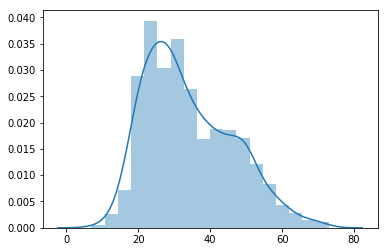

In [12]:
sns.distplot(ages)

In [13]:
user_fields.map(lambda fields: (fields[3], 1)).collect()

[('technician', 1),
 ('other', 1),
 ('writer', 1),
 ('technician', 1),
 ('other', 1),
 ('executive', 1),
 ('administrator', 1),
 ('administrator', 1),
 ('student', 1),
 ('lawyer', 1),
 ('other', 1),
 ('other', 1),
 ('educator', 1),
 ('scientist', 1),
 ('educator', 1),
 ('entertainment', 1),
 ('programmer', 1),
 ('other', 1),
 ('librarian', 1),
 ('homemaker', 1),
 ('writer', 1),
 ('writer', 1),
 ('artist', 1),
 ('artist', 1),
 ('engineer', 1),
 ('engineer', 1),
 ('librarian', 1),
 ('writer', 1),
 ('programmer', 1),
 ('student', 1),
 ('artist', 1),
 ('student', 1),
 ('student', 1),
 ('administrator', 1),
 ('homemaker', 1),
 ('student', 1),
 ('student', 1),
 ('other', 1),
 ('entertainment', 1),
 ('scientist', 1),
 ('engineer', 1),
 ('administrator', 1),
 ('librarian', 1),
 ('technician', 1),
 ('programmer', 1),
 ('marketing', 1),
 ('marketing', 1),
 ('administrator', 1),
 ('student', 1),
 ('writer', 1),
 ('educator', 1),
 ('student', 1),
 ('programmer', 1),
 ('executive', 1),
 ('programme

In [14]:
count_by_occupation = user_fields.map(lambda fields: (fields[3],1)).reduceByKey(lambda x, y: x + y).collect()

In [15]:
count_by_occupation

[('other', 105),
 ('executive', 32),
 ('administrator', 79),
 ('student', 196),
 ('educator', 95),
 ('programmer', 66),
 ('homemaker', 7),
 ('artist', 28),
 ('engineer', 67),
 ('none', 9),
 ('retired', 14),
 ('doctor', 7),
 ('technician', 27),
 ('writer', 45),
 ('lawyer', 12),
 ('scientist', 31),
 ('entertainment', 18),
 ('librarian', 51),
 ('marketing', 26),
 ('healthcare', 16),
 ('salesman', 12)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

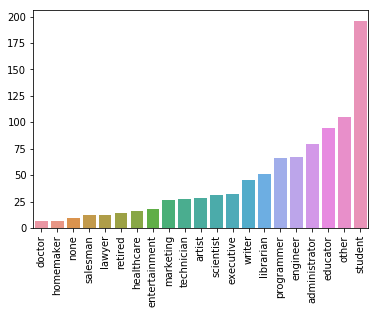

In [16]:
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])
x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

pos = np.arange(len(x_axis))
width = 1.0

sns.barplot(x=x_axis, y=y_axis)
plt.xticks(rotation=90)

In [18]:
count_by_occupation2 = user_fields.map(lambda x: x[3]).countByValue()

In [19]:
count_by_sex = user_fields.map(lambda x: x[2]).countByValue()

In [20]:
type(count_by_sex)

collections.defaultdict

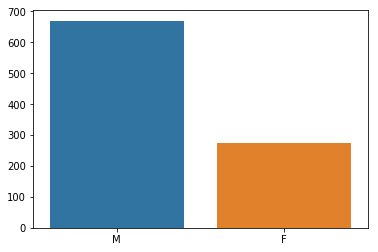

In [21]:
x = list(count_by_sex.keys())
y = list(count_by_sex.values())
sns.barplot(x=x ,y=y)

In [22]:
# 分析电影数据
movie_data = sc.textFile('/Users/dzzxjl/data/ml-100k/u.item')
# 从文件读取获得RDD文件
movie_data

/Users/dzzxjl/data/ml-100k/u.item MapPartitionsRDD[31] at textFile at NativeMethodAccessorImpl.java:0

In [23]:
# 显示第一条数据
movie_data.first()

'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0'

In [24]:
# 显示电影总数
movie_data.count()

1682

In [26]:
# 查看电影发行日期
# 因为部分行不满足函数内的条件，因此会报错
# movie_data.map(lambda x: x.split('|')[2].split('-')[1]).collect()

In [27]:
def convert_year(date):
    try:
#         date.split('-')[2] = int(date.split('-')[2])
#         int(date.split('-')[2])
        return int(date.split('-')[2])
    except:
        return 1900

# print(convert_year('01-Jan-1995'))

In [29]:

# 数据过多，导致不容易绘图，因此仅筛选1980年之后的年份
movie_years = movie_data.map(lambda x: x.split('|')[2]).map(lambda date: convert_year(date)).filter(lambda x: x>1980)
movie_years

PythonRDD[35] at RDD at PythonRDD.scala:48

In [30]:
movie_ages = movie_years.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortByKey()

In [45]:
years = movie_ages.keys().collect()
years_new = []
for x in years:
    years_new.append(str(x))
years_count = movie_ages.values().collect()
years_new = tuple(years_new)

In [51]:
type(years_new)

tuple

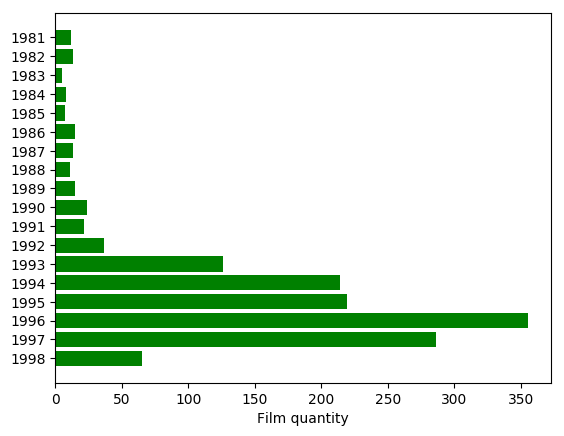

In [66]:
fig, ax = plt.subplots()
# ax.bar()
y_pos = np.arange(len(years_new))
ax.set_yticks(y_pos)
ax.set_yticklabels(years_new)
ax.invert_yaxis()  # labels read top-to-bottom

ax.barh(y_pos, years_count,  align='center',
        color='green', ecolor='black')
ax.set_xlabel('Film quantity')
# plt.xticks(rotation=90)

In [68]:
movie_data.first()

'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0'

In [139]:
# 统计最多出现的词汇
# movie_data.map(lambda x: x.split('|')[1]).map(lambda x: x.split(' ')).collect()
# movie_data.map(lambda x: x.split('|')[1]).flatMap(lambda x: x.split(' ')).collect()
temp1 = movie_data.map(lambda x: x.split('|')[1]).flatMap(lambda x: x.split(' ')).map(lambda x: (x,1))


temp2 = temp1.reduceByKey(lambda x, y: x+y)

temp3 = temp2.map(lambda x: (x[1],x[0])).sortByKey(False)

words = ['The', 'the', 'of', 'and', 'in', 'A', 'a', 'to', '&', 'on', 'de', 'In', 'for']
num = '19'
temp4 = temp3.filter(lambda x: x[0] > 10).filter(lambda x:x[1] not in words).filter(lambda x:num not in x[1]).collect()

In [140]:
temp4

[(27, 'Love'),
 (23, 'Man'),
 (22, 'My'),
 (18, 'Life'),
 (13, 'Star'),
 (13, 'Night'),
 (13, 'I'),
 (13, 'Time'),
 (12, 'Dead'),
 (12, 'It'),
 (12, 'Day'),
 (11, 'Last'),
 (11, 'Big')]

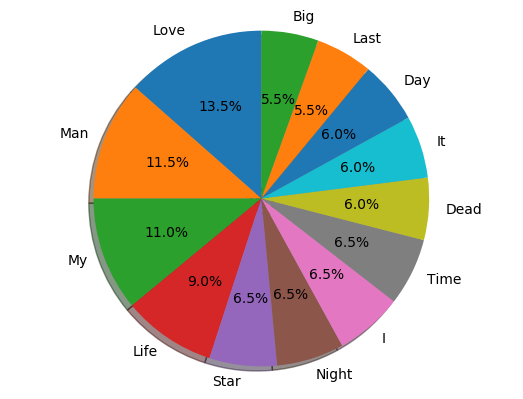

In [141]:

def huabingtu(map):
    labels = []
    sizes = []
    for x in map:
#         labels.append(x)
#         sizes.append(map[x])
        labels.append(x[1])
        sizes.append(x[0])
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
    
huabingtu(temp4)

In [142]:
movie_data.first()

'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0'